# Titanic: Machine Learning from Disaster
Although it need not be restated but a brief description of this begginner challenge could be read at [Titanic](https://www.kaggle.com/c/titanic#description). Data record of each passenger is provided under various columns, represeting features such as 'PassengerId','Name', 'Sex', 'Plcass' etc which constitutes training & test dataset to be further evaluated for predictions on any/unseen data.

[Prediction](https://www.kaggle.com/c/titanic#evaluation): Survival Prediction, the value of which is 0(if Passenger is dead) or 1(if survived).
Survival feature values are provived alongside training dataset to map features to prediction target.

Task is to output Survival predictions corresponding to Titanic test data and save them to a csv file for final [submission to kaggle](https://www.kaggle.com/c/titanic/submit), to evaluate how accurate is one trained machine learning model in matching test prediction labels to true labels.




## 1. Basic imports: library packages & tools:

In [1]:
#libs for data manipulation
import pandas as pd
import numpy as np

#libs for data visulization & analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning methods
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Loading training & test dataset to the shelf:
> extracting all categorical, numerical & non numerical features that could be of potentially use for correlation with target variable<B>("Survived").</B>
Now <B>train_x</B> stores all extracted features under various label as <B>'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked'</B> and <B>train_y</B> stores the correspnding true labels.
<B>test_x</B> stores the test data to be evaluated for predictions via different trained classifiers.
shape of:
<B>train_x</B> is (891,7), <B>train_y</B> is (819)
<B>test_x</B> is (418,7)

In [2]:
dataset = pd.read_csv('../data/train.csv')
train_x = dataset[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
train_y = dataset['Survived'].values 

testdata= pd.read_csv('../data/test.csv')
test_x= testdata[train_x.columns.values] #makes it same size as train_x column wise

print dataset.shape, train_x.shape, train_y.shape, test_x.shape
train_x.head(10) #train_x.head()

(891, 12) (891, 7) (891,) (418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [3]:
test_x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## 3. Data Analysis & Visualization:

### checking missing/NaNs values & datatypes for values across train & test datasets.
Before being fed to fit a machine learning model, incoming data need to be obliterated with Null, sparesely distributed and inconsitent values, which necessitates <B>Data cleaning</B> as pre-requiste procedure alongside deducing best features which are most representative of the resulting values(Target Variable) via numerical or visual correlation.

In [4]:
print'train data description:'
dataset.info(),
print'\n','test data description:'
test_x.info()

train data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB

test data description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)


### Therefore there are:
- 177 and 86 Null Age values in train & test data respectively
- 2 NaNs in Embarked vals from Train data 
- 687 NaNs in Cabin from Train data
- 1 NaN in Fare in test data

### Distribution of numerical features values across the samples in train dataset

In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualizing Survival instances across spectrum of different age groups.

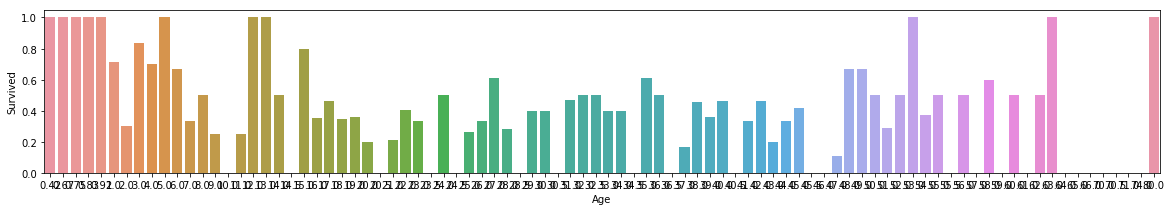

In [6]:
figure, axis = plt.subplots(1,1,figsize=(20,3))
age = dataset[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data= age)

c:\python27\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


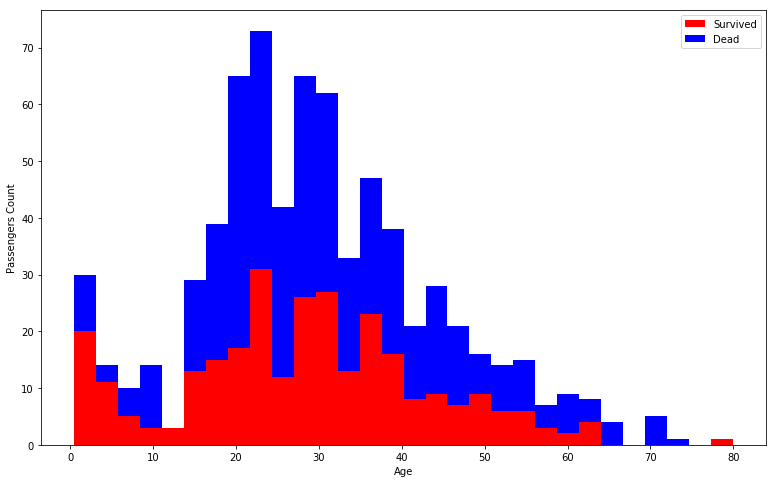

In [7]:
figure = plt.figure(figsize=(13,8))
plt.hist([train_x[dataset['Survived']==1]['Age'].dropna(),train_x[dataset['Survived']==0]['Age'].dropna()], stacked=True, color = ['r','b'], bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Passengers Count')
plt.legend()

#### Only 38% of people survived, Majority of those who survived were non-adults/passenger of age less than 15
Thus "Age" is in high correlation with "Survived"

## 4. Data Munging:

In [8]:
#filling correlated age individually to NaNs in train set & test set.
age_fill = [train_x['Age'].median(), test_x['Age'].median()]
train_x['Age'].fillna(age_fill[0], inplace=True)
test_x['Age'].fillna(age_fill[1], inplace=True)

c:\python27\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Combining <B>train_x</B> and <B>test_x</B> into single dataframe for ease of feature completion and numerical transformation simultaneoulsy on both sets
- Original shape of train_x is (891,7) and test_x is (418,7)
- after the task is done, both dataframes will be detached again

In [9]:
print train_x.shape, train_y.shape
combined = train_x.append(test_x) #[featureset, test_x]
print type(combined), combined.shape

(891, 7) (891,)
<class 'pandas.core.frame.DataFrame'> (1309, 7)


          female  male
Survived     233   109
Dead          81   468


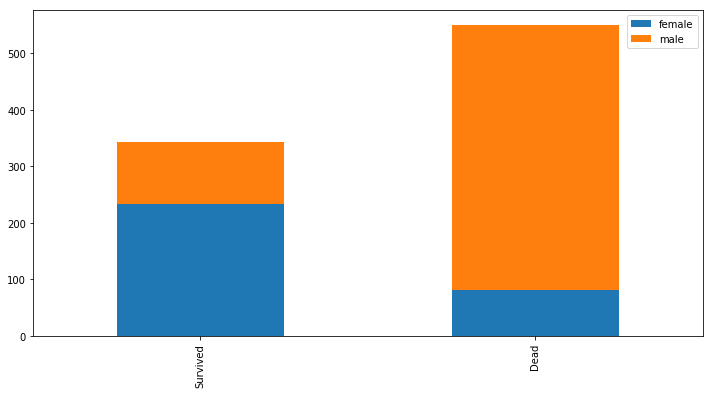

In [10]:
survived_peeps = train_x[dataset['Survived']==1]['Sex'].value_counts()
dead_peeps = train_x[dataset['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_peeps,dead_peeps])
df.index = ['Survived','Dead']
print df
df.plot(kind='bar',stacked=True, figsize=(12,6))

### Therefore, there is high correlation betweeb Survived and Sex, Females are majorly saved.

Therefore transforming this categorical text feature to numerical equivalents.

In [11]:
fixSex = combined['Sex'].copy().values
fixSex[fixSex == 'male'] = 0  #changing Categorical(Sex) into numerical analogue
fixSex[fixSex == 'female'] = 1 
fixSex.shape 

(1309,)

c:\python27\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


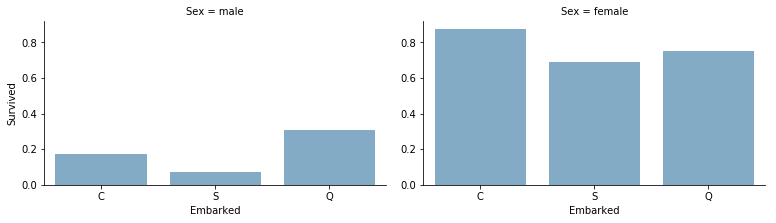

In [12]:
grid = sns.FacetGrid(dataset, col ='Sex', size = 3.2, aspect =1.7)
grid.map(sns.barplot, 'Embarked','Survived', alpha= 0.6, ci = None)

### Embarked feature also shows high correlation with Sex and also Survived
Therefore filling Empty values in column with the most occuring value 'S', subsequently transforming categorical text values in Embarked to numerical equivalents.

In [13]:
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True) #filling Null vals in Embarked column
fixEmb = combined['Embarked'].copy().values

fixEmb[fixEmb =='S'] = 0 #changing Embarked into numerical analogue
fixEmb[fixEmb =='C'] = 1
fixEmb[fixEmb =='Q'] = 2
fixEmb.shape

(1309,)

### Ensuring each colum is complete and non-null now

In [14]:
#combined['Age'].fillna(sum(age_fill)/2, inplace=True) 
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined.info() #all features have non null values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 71.6+ KB


### Replacing Non-numerical feature columns with transformed values
##### original Featureset( train_x + test_x) Dataframe

In [15]:
print combined.shape
combined.head(15) #dataset before being transformed to wholly numeric

(1309, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,28.0,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


### Featureset dataframe after all numerical values have been placed

In [16]:
allnum_dataset = combined.copy()
allnum_dataset.loc[:,'Sex'] = fixSex #assigning numeric nd arrays to columns that held string vals.
allnum_dataset.loc[:,'Embarked'] = fixEmb
allnum_dataset.head(15) #after numerical feature transformation

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
5,3,0,28.0,0,0,8.4583,2
6,1,0,54.0,0,0,51.8625,0
7,3,0,2.0,3,1,21.0750,0
8,3,1,27.0,0,2,11.1333,0
9,2,1,14.0,1,0,30.0708,1


### Slicing trainining features and Test features back into separate variable for Training & evaluating
- shape of X(final Training data) is (891,7)
- shape of test_x(final test data) is (418,7)

In [17]:
X = allnum_dataset.copy()[:891]
test_x=  allnum_dataset.copy()[891:]
X.shape, test_x.shape #final split of training and test data

((891, 7), (418, 7))

## 5. Performing the Train and validation data split for initial accuracy evaluation on first model (SVM):
- XtrainV : Xtrain validation matrix, shape (623,7)
- ytrainV : ytrain validation label, shape (623)
- XtestV  : Xtest validation matrix, shape (268,7)
- ytestV : ytest validation label, shape (268)
 

In [18]:
XtrainV, XtestV, ytrainV, ytestV = train_test_split(X,train_y, test_size = 0.30)
XtrainV.shape, ytrainV.shape, XtestV.shape, ytestV.shape  # X = XtrainV(70%) + XtestV(30%), train_y = ytrainV(70%) +ytestV(30%)

((623, 7), (623,), (268, 7), (268,))

## 6. Model initiation, Model training and test Predictions

### 6.1 SVM- rbf kernel classifier
- classifier initiation & Data fitting
- classifier test data prediction & accuracy
- submission to csv.

Note: Here utilizing training split data for validation first thereafter using complete training dataset for training & submitting target prediction for whole test data for rest of the classifier models. 

In [19]:
cla_sv =svm.SVC()# svm kernel = rbf
cla_sv

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
print "size of validation training data:","X inputs->", XtrainV.shape,", y targets-> ", ytrainV.shape
cla_sv.fit(XtrainV, ytrainV)
print "\n","expected accuracy on solely on training data basis:",cla_sv.score(XtrainV, ytrainV)

size of validation training data: X inputs-> (623, 7) , y targets->  (623,)

expected accuracy on solely on training data basis: 0.911717495987


In [21]:
print "size of validation test data:","X inputs->", XtestV.shape,", y targets-> ", ytestV.shape
ypred = cla_sv.predict(XtestV)
print "\n","expected prediction accuracy:", metrics.accuracy_score(ytestV, ypred)

size of validation test data: X inputs-> (268, 7) , y targets->  (268,)

expected prediction accuracy: 0.64552238806


In [22]:
#Now applying RBF kernel SVM on complete training data
print "size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape
cla_sv.fit(X, train_y)
print "\n","expected accuracy on solely training data basis:", cla_sv.score(X, train_y)

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

expected accuracy on solely training data basis: 0.892255892256


In [23]:
print "size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0]
target_sv = cla_sv.predict(test_x)
submission_sv= pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_sv})


size of whole test data: X inputs-> (418, 7) y targets-> 418


In [24]:
submission_sv.shape
submission_sv.head(10)
submission_sv.to_csv('../output/submission_sv.csv', index=False)

##### Accuracy for SVM rbf kernel model: 89.22 %



### 6.2 SVM- linear kernel classifier
- classifier initiation & Data fitting
- classifier test data prediction & accuracy
- submission to csv.


In [25]:
#Now applying linear kernel SVM on complete training data
cla_linsv =svm.SVC(kernel= 'linear')
print "size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape
cla_linsv.fit(X, train_y)
print "\n","expected accuracy on solely training data basis:", cla_linsv.score(X, train_y)

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

expected accuracy on solely training data basis: 0.786756453423


In [26]:
print "size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0]
target_linsv = cla_linsv.predict(test_x)
submission_linsv= pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_linsv})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [27]:
print submission_linsv.shape
submission_linsv.to_csv('../output/submission_linsv.csv', index=False)

(418, 2)


##### Accuracy for linear SVM model: 78.675 %



### 6.3 logistic regression classifier
- classifier initiation & Data fitting
- classifier test data prediction & accuracy
- submission to csv.


In [28]:
#Now using logistic regression on complete training data
cla_log= LogisticRegression()
print "size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape
cla_log.fit(X, train_y)
print "\n","expected accuracy on solely training data basis:", cla_log.score(X, train_y)

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

expected accuracy on solely training data basis: 0.799102132435


In [29]:
print "size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0]
target_log = cla_log.predict(test_x)
submission_log = pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_log})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [30]:
print submission_log.shape
submission_log.to_csv('../output/submission_log.csv', index=False)

(418, 2)


##### Accuracy for logistic regression model: 79.910 %



### 6.4 Decision Tree classifier
- classifier initiation & Data fitting
- classifier test data prediction & accuracy
- submission to csv.


In [31]:
#Now using descision tree on complete training data
cla_dt= DecisionTreeClassifier()
print "size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape
cla_dt.fit(X, train_y)
print "\n","expected accuracy on solely training data basis:", cla_dt.score(X, train_y)

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

expected accuracy on solely training data basis: 0.979797979798


In [32]:
print "size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0]
target_dt = cla_dt.predict(test_x)
submission_dt = pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_dt})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [33]:
print "results through Decision Tree method", submission_log.shape
submission_dt.to_csv('../output/submission_dt.csv', index=False)

results through Decision Tree method (418, 2)


##### Accuracy for Decision Trees model: 97.979 %


### 6.5 Random forest classifier
- classifier initiation & Data fitting
- classifier test data prediction & accuracy
- submission to csv.


In [34]:
#Now using Random forests on complete training data
cla_forest = RandomForestClassifier(n_estimators=100)
print "size of whole training data:","X inputs->", X.shape,", y targets-> ", train_y.shape
cla_forest.fit(X, train_y)
print "\n","expected accuracy on solely training data basis:", cla_forest.score(X, train_y)

size of whole training data: X inputs-> (891, 7) , y targets->  (891,)

expected accuracy on solely training data basis: 0.979797979798


In [35]:
print "size of whole test data:","X inputs->", test_x.shape,  "y targets->", test_x.shape[0]
target_forest = cla_forest.predict(test_x)
submission_forest = pd.DataFrame({'PassengerId':testdata['PassengerId'].values, 'Survived': target_forest})

size of whole test data: X inputs-> (418, 7) y targets-> 418


In [36]:
print "results random forest method", submission_forest.shape
submission_forest.to_csv('../output/submission_forest.csv', index=False)

results random forest method (418, 2)


##### Accuracy for random forest model: 97.979 %

## 7. Model evaluation table:



In [37]:
#Model evaluation
models= pd.DataFrame({'Models':['SVM_rbf','SVM_linear','Logistic regression', 'Decision Trees','Random forest'],'Accuracy':[cla_sv.score(X, train_y), cla_linsv.score(X, train_y),cla_log.score(X, train_y),cla_dt.score(X, train_y), cla_forest.score(X, train_y)]})
models.sort_values(by='Accuracy', ascending= False)                                    

,Accuracy,Models
3,0.979798,Decision Trees
4,0.979798,Random forest
0,0.892256,SVM_rbf
2,0.799102,Logistic regression
1,0.786756,SVM_linear


### The submission.csv ouput after testing Titatanic test dataset on a trained linear SVM classifier model, when put further to kaggle submission yields a score of 0.7655 on public leaderboard.

## [ ] Concluding remarks:
- The results post fitting different supervised learning models on cross validation data and scores solely from training dataset yield accuracy as high as ~98% (Random forest & Decision tree model), Though it achieves far lower score(~77%) when select fitted models are tested against Titatanic test data. Which infers, the models overfit training data for certain features such as Age.
- As the NaNs in Age column across training & test dataset were filled merely by assigning the <B>median age</B> value for existing age values from corresponding dataset(<B>train_x['Age'].median()</B> for NaNs in training dataset, similarly <B>test_x['Age'].median()</B> for test dataset NaNs), this approach generalises age wholly from either set to fill NaNs, neglecting varied correlation of missing age values with full & largely representing features like <B>Pclass</B> & <B>Sex</B>, therefore age values for empty spots could be further differently customised as per corresponding Pclass & Sex values, by drawing numerical correlation amongst these three features.
- Since this script was aimed for quick & raw implementation of a functional machine Learning model on real data, just to get a hands on feel of tinkering with data and suffiently processing it to fit various learning models and yield prediction for submission, the reason test data prediction accuracy lags to just 77% could be insufficient feature engineering in yielding more representative features, as most of the columns/labels(such as <B>Names, Tikets</B>) were discarded in the beginning, also extisting features like <B>SibSp, Parch</B> could be manipulated to create <B>artificial gross values</B>.

### P.S. i'm certain of the gross inconsitencies with implementation of couple of methods that could have been shortened to just a line code, as it's my very first face-off with python's data science manip. tools & ML libraries on kaggle datasets, please feel free to suggest rectifications, Suggestions are very much welcome.
